In [31]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [32]:
M = np.loadtxt("data/chi2/M_matrix.txt")
M_prior = np.loadtxt("data/chi2/M_prior.txt")

V_pdg = np.array([0.97373, 0.2243, 0.00382, 0.221, 0.975, 0.0408])

In [33]:
M_chi2 = M + M_prior
Minv = np.linalg.inv(M_chi2)

In [34]:
identity_check = np.allclose(Minv @ M_chi2, np.eye(Minv.shape[0]), atol=1e-4)
print("Is Minv @ M_chi2 numerically the identity?", identity_check)

Is Minv @ M_chi2 numerically the identity? True


### Correlation Matrix

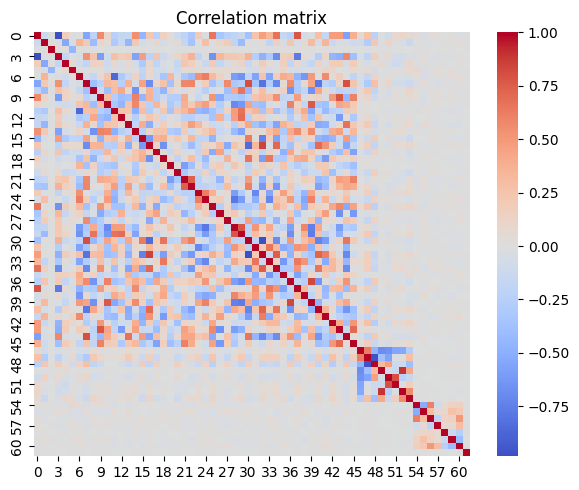

In [35]:
cov = Minv 
stds = np.sqrt(np.diag(cov))
corr= cov / np.outer(stds, stds)



plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, fmt=".2f",  cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


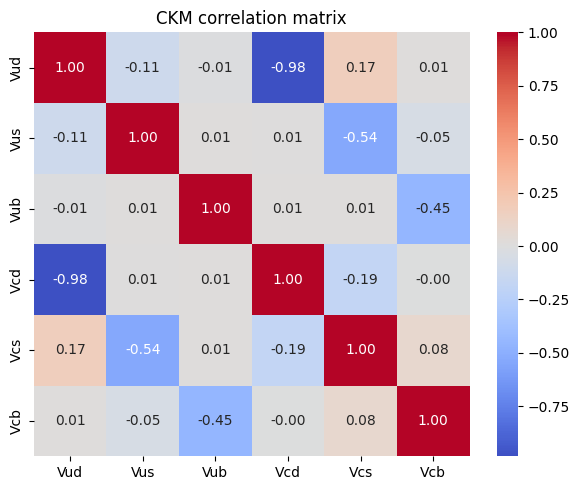

In [36]:
cov_ckm = Minv[:6, :6]  
stds = np.sqrt(np.diag(cov_ckm))
corr_ckm = cov_ckm / np.outer(stds, stds)


labels = ['Vud', 'Vus', 'Vub', 'Vcd', 'Vcs', 'Vcb']

plt.figure(figsize=(6,5))
sns.heatmap(corr_ckm, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="coolwarm", center=0)
plt.title("CKM correlation matrix")
plt.tight_layout()
plt.show()


### Contour Plot

In [37]:
# Pick two parameters to plot the contour, 
# 0 = Vud, 1 = Vus, 2 = Vub, 3 = Vcd, 4 = Vcs, 5 = Vcb

i = 0
j = 3




Semiaxes lengths: a = 0.005361231839924821, b = 2.8179504336394383e-05


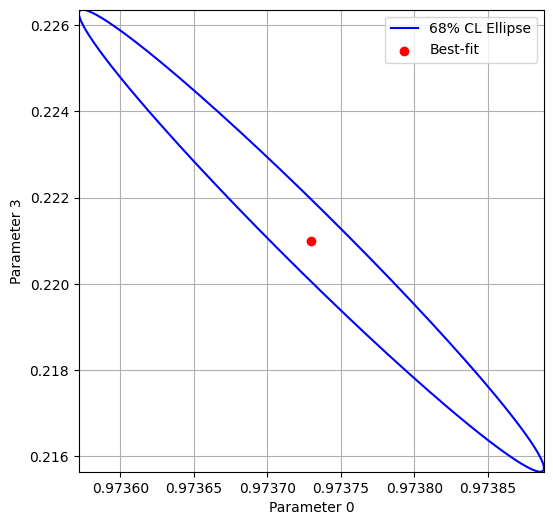

In [54]:
Σ_2d = Minv[[i, j]][:, [i, j]]

center_i = V_pdg[i]
center_j = V_pdg[j]

vals, vecs = np.linalg.eigh(Σ_2d) 

chi_2_val = 2.30  # 68% CL for 2 dof

a = np.sqrt(chi_2_val * vals[1])  
b = np.sqrt(chi_2_val * vals[0])  

θ = np.arctan2(vecs[1, 1], vecs[0, 1])  

print(f"Semiaxes lengths: a = {a}, b = {b}")

# --- Parametrizzazione ellisse ---
t = np.linspace(0, 2*np.pi, 200)
x_ellipse = a * np.cos(t)
y_ellipse = b * np.sin(t)

# Rotazione dell'ellisse
x_rot = x_ellipse * np.cos(θ) - y_ellipse * np.sin(θ)
y_rot = x_ellipse * np.sin(θ) + y_ellipse * np.cos(θ)

# Traslazione al centro
x_final = center_i + x_rot
y_final = center_j + y_rot


# Trova min e max considerando l'ellisse e il best-fit
x_min, x_max = min(x_final.min(), center_i), max(x_final.max(), center_i)
y_min, y_max = min(y_final.min(), center_j), max(y_final.max(), center_j)

# Aggiungi un piccolo margine per estetica
margin_x = (x_max - x_min)
margin_y =  (y_max - y_min)



# --- Plot ---
plt.figure(figsize=(6,6))

plt.plot(x_final, y_final, 'b-', label='68% CL Ellipse')
plt.scatter(center_i, center_j, color='red', label='Best-fit')
plt.xlabel(f'Parameter {i}')
plt.ylabel(f'Parameter {j}')
#plt.axis('equal')
plt.legend()
plt.xlim(x_min , x_max )
plt.ylim(y_min , y_max )
plt.grid(True)
plt.show()